In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from color_grabber.color_grabber_v0 import grab_colors
from semantic_segmentation.semantic_segmentation_v0 import get_segmentation_mask

In [33]:
repo_dir = '/Users/sdale/repos/find_my_tie'
# path = 'dataset_v0/71PWXMsBxRL._AC_SX679_.jpg'
# path = 'dataset_v0/61ig2XNgwcL._AC_SX679_.jpg'
# path = 'dataset_v0/719LoHr9jzL._AC_SX679_.jpg'
path = 'dataset_v0/7148bKIKvWL._AC_SY879_.jpg'
path = os.path.join(repo_dir, path)
assert(os.path.exists(path))
img = cv2.imread(path)

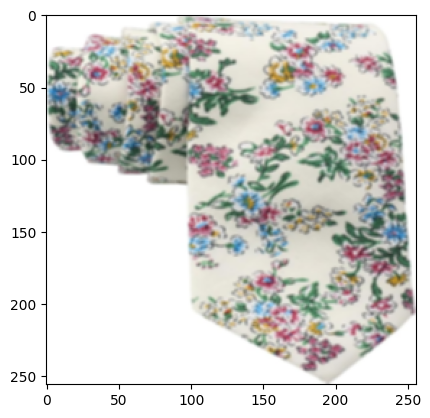

In [29]:
SIZE = 256
img = cv2.resize(img, (SIZE, SIZE))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

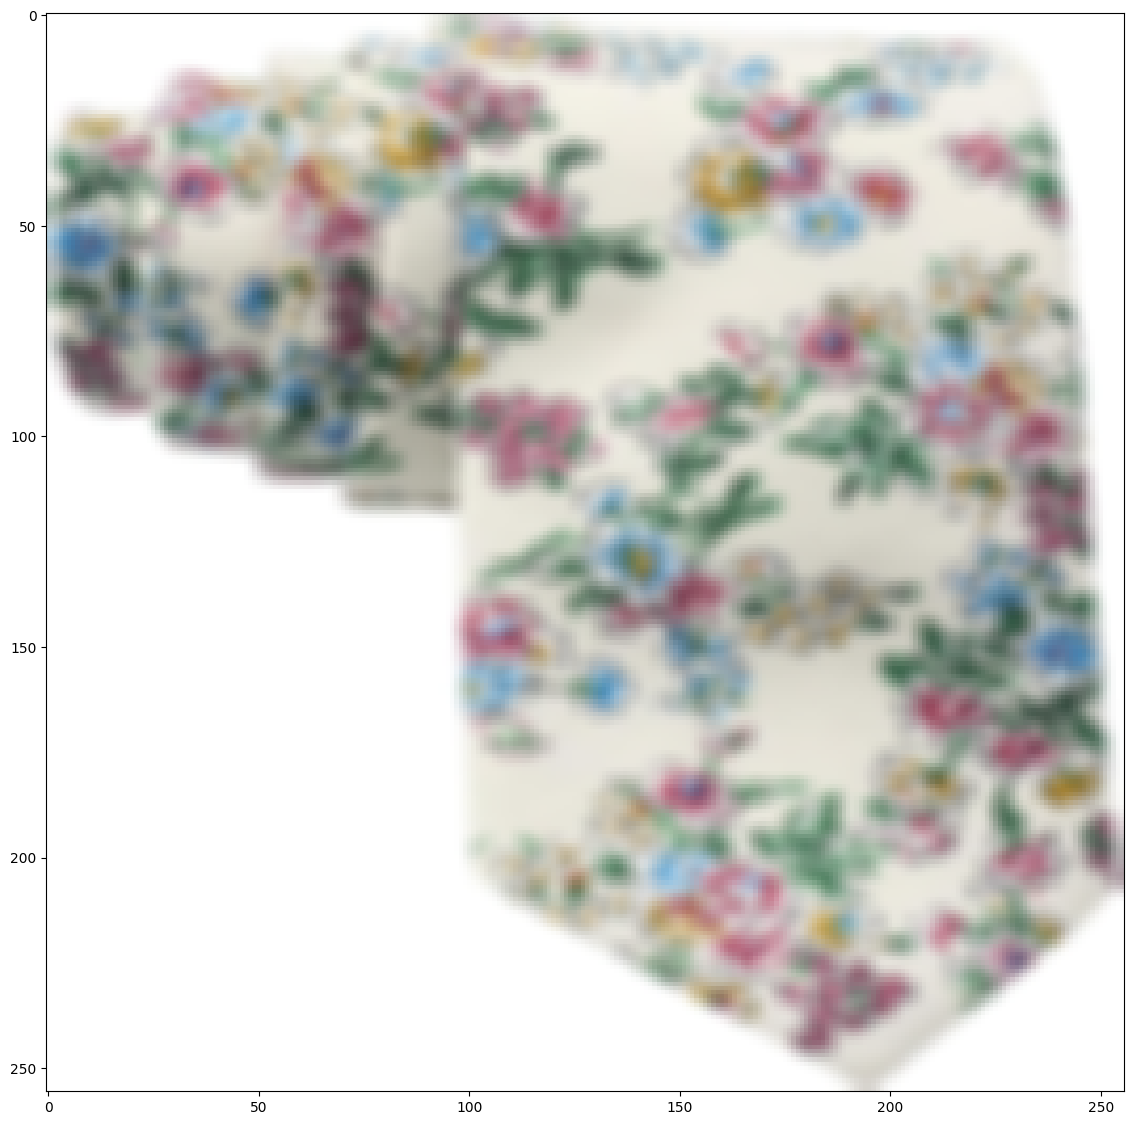

In [30]:
img = cv2.GaussianBlur(img, (5, 5), 10)
plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

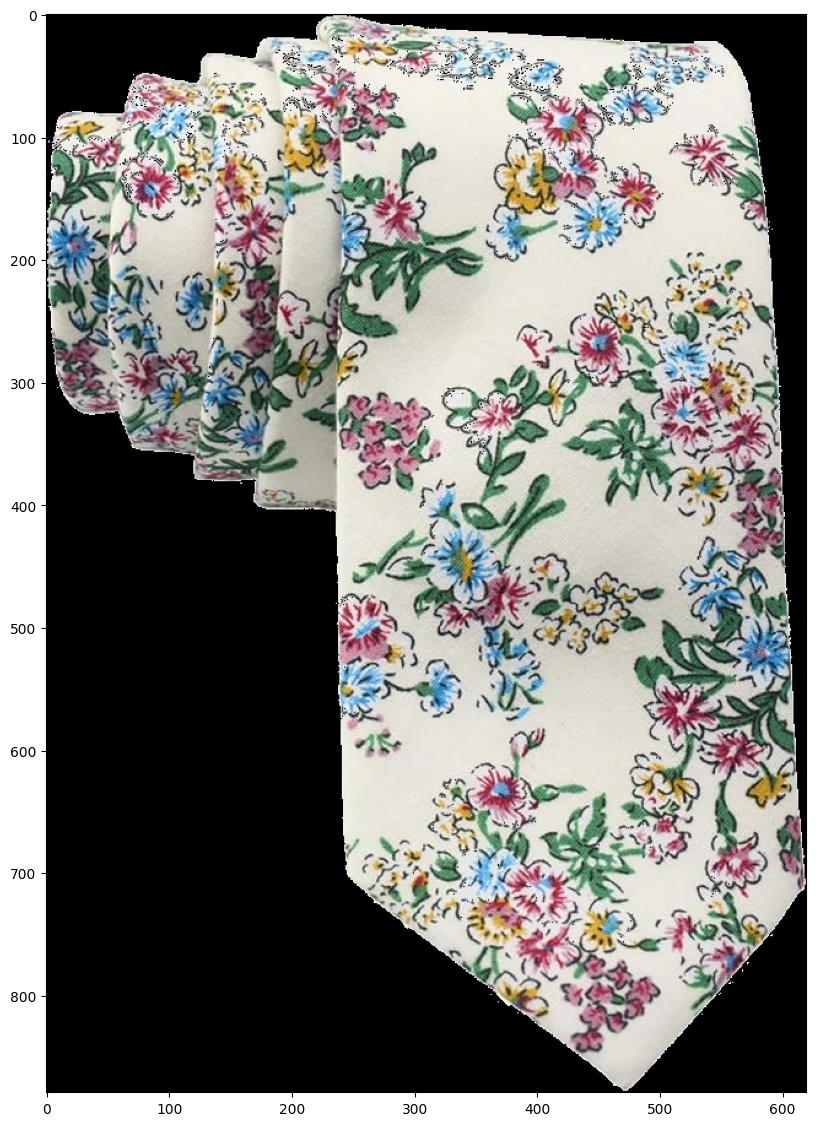

In [35]:
plt.figure(figsize=(14, 14))
mask = get_segmentation_mask(img)
masked_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

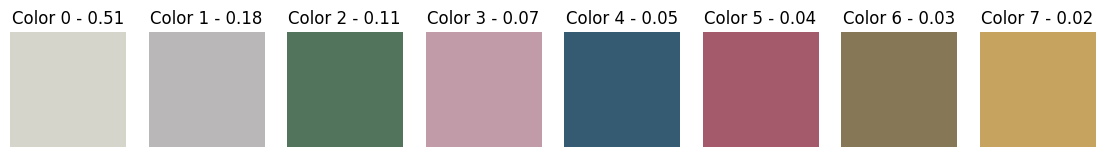

In [37]:
K = 8
N = K
cols = min(8, N)
rows = (N // cols) + 1
fig = plt.figure(figsize=(14, 7)) 
# centroids, weights, center_points = grab_colors(img, K, weights=(5, 100, 100, 1, 1), resize=False, blur=5)
centroids, weights, center_points = grab_colors(img, K, weights=(1, 100, 100, 1, 1), resize=False, blur=None)
sorted_inx = np.argsort(weights)[::-1]
centroids = centroids[sorted_inx[:N]]
weights = weights[sorted_inx[:N]]
center_points = center_points[sorted_inx[:N]]
for i in range(len(weights)):
    fig.add_subplot(rows, cols, i+1) 
    plt.title(f'Color {i} - {weights[i]:.2f}')
    # lab = [int(x) for x in centroids[i]][:3]
    lab = [int(x) for x in center_points[i]][:3]
    square = np.full((5, 5, 3), lab, dtype=np.uint8)
    plt.imshow(cv2.cvtColor(square, cv2.COLOR_LAB2RGB))
    plt.axis('off')

In [ ]:
K = 8
dataset_dir = 'dataset_v0.1'
paths = [os.path.join(dataset_dir, x) for x in os.listdir(dataset_dir) if '.jpg' in x or '.png' in x]
data = {'path': [], 'color_l': [], 'color_a': [], 'color_b': [], 'weight': []}
for path in tqdm(paths):
    assert(os.path.exists(path))
    plt.imread(path)
for path in tqdm(paths):
    assert(os.path.exists(path))
    img = cv2.imread(path)
    try:
        centroids, weights, center_points = grab_colors(img, K, weights=(5, 100, 100, 1, 1), resize=False, blur=False)
    except:
        continue
    sorted_inx = np.argsort(weights)[::-1]
    centroids = centroids[sorted_inx]
    weights = weights[sorted_inx]
    center_points = center_points[sorted_inx]
    for i in range(len(weights)):
        lab = [int(x) for x in center_points[i]][:3]
        data['path'].append(path)
        data['color_l'].append(lab[0])
        data['color_a'].append(lab[1])
        data['color_b'].append(lab[2])
        data['weight'].append(weights[i])

In [ ]:
df = pd.DataFrame(data)
df.to_csv('dataset_v0.1/color_data.csv', index=False)